In [1]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

In [2]:
# Now you can load the audio file
audio = AudioSegment.from_file("18. Complaint Against the Wicked.mp3", format="mp3")



In [20]:
# `min_silence_len` sets the minimum duration of silence to consider (in milliseconds)
# `silence_thresh` sets the volume threshold below which audio is considered silence
# Set parameters
silence_thresh = -41 # Adjust this threshold as needed
\
min_silence_duration = 700  # Minimum silence duration in milliseconds
min_segment_length = 500  # Minimum segment length in mill"iseconds


# Split audio into segments based on silence
segments = split_on_silence(
    audio,
    silence_thresh=silence_thresh,
    min_silence_len=min_silence_duration,
    keep_silence=min_segment_length
    
)  # Adjust as needed
print(len(segments))

6


In [21]:
# Export each segment
for i, segment in enumerate(segments):
    output_file = f"soundclip/output_segment_{i}.mp3"
    segment = segment.fade_out(500)
    segment.export(output_file, format="mp3")

print(f"Audio splitting complete. {len(segments)} segments created.")

Audio splitting complete. 6 segments created.


In [12]:
# Define your segment start and end times in milliseconds
segment_start = 12000 # Start at 10 seconds (10000 ms)
segment_end = 22000  # End at 30 seconds (30000 ms)

# Extract the desired segment
desired_segment = audio[segment_start:segment_end]

# Export the segment to a new audio file
desired_segment.export("intro.mp3", format="mp3")

<_io.BufferedRandom name='intro.mp3'>

In [19]:
# Export combined segments
if segments:
    output_file = f"soundclip/combined_segments.mp3"
    segments[0] = segments[0].fade_out(300)
    segments[1] = segments[1].fade_out(300)
    segments[-1] = segments[-1].fade_out(300)
    combined_segment = segments[0] + AudioSegment.silent(duration=700) + segments[1] + AudioSegment.silent(duration=700) + segments[1] + AudioSegment.silent(duration=1000) + segments[-1]

    combined_segment.export(output_file, format="mp3")


print(f"Audio splitting complete. {len(combined_segment)} segments created.")

Audio splitting complete. 111811 segments created.


In [105]:

# Calculate the duration of the first segment in seconds
duration_seconds = len(segments[1]) / 1000  # Convert milliseconds to seconds

print(f"The duration of the first segment is {duration_seconds} seconds.")


The duration of the first segment is 35.213 seconds.


In [124]:
# Now you can load the audio file
audio = AudioSegment.from_file("Psalter/1. The Blessedness of the Godly.mp3", format="mp3")


# `min_silence_len` sets the minimum duration of silence to consider (in milliseconds)
# `silence_thresh` sets the volume threshold below which audio is considered silence
# Set parameters
silence_thresh = -39  # Adjust this threshold as needed
min_silence_duration = 1000  # Minimum silence duration in milliseconds
min_segment_length = 500  # Minimum segment length in milliseconds

# Split audio into segments based on silence
segments = split_on_silence(
    audio,
    silence_thresh=silence_thresh,
    min_silence_len=min_silence_duration,
    keep_silence=min_segment_length
    
)  # Adjust as needed
print(len(segments))

# Export each segment
for i, segment in enumerate(segments):
    output_file = f"soundclip/output_segment_{i}.mp3"
    segment = segment.fade_out(200)
    segment.export(output_file, format="mp3")

print(f"Audio splitting complete. {len(segments)} segments created.")

#export combined segments
if segments:
    output_file = f"soundclip/combined_segments.mp3"
    segments[0] = segments[0].fade_out(200)
    segments[1] = segments[1].fade_out(200)
    segments[-1] = segments[-1].fade_out(200)
    combined_segment = segments[0] + AudioSegment.silent(duration=700) + segments[1] + AudioSegment.silent(duration=700) + segments[1] + AudioSegment.silent(duration=1000) + segments[-1]

    combined_segment.export(output_file, format="mp3")


# # Calculate the duration of the first segment in seconds
# duration_seconds = len(segments[0]) / 1000  # Convert milliseconds to seconds

# print(f"The duration of the first segment is {duration_seconds} seconds.")

5
Audio splitting complete. 5 segments created.


/var/folders/lp/r1wrblbj4174bnvx_y0jwqqh0000gn/T/ipykernel_3345/2539744079.py:23: RuntimeWarning: divide by zero encountered in log10
  rms_dbfs = 20 * np.log10(rms_level / (2 ** 15))
/var/folders/lp/r1wrblbj4174bnvx_y0jwqqh0000gn/T/ipykernel_3345/2539744079.py:24: RuntimeWarning: divide by zero encountered in log10
  peak_dbfs = 20 * np.log10(peak_level / (2 ** 15))


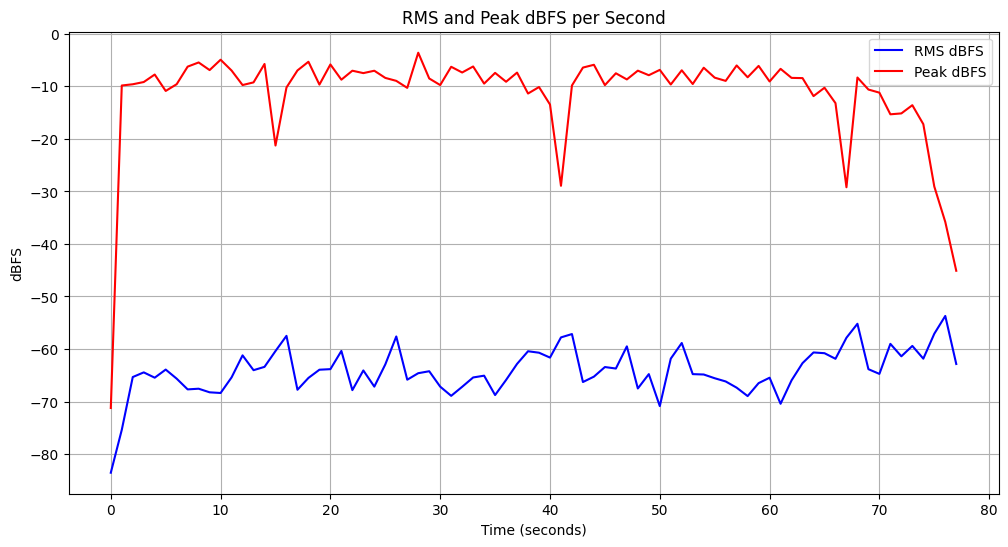

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment

# Now you can load the audio file
audio = AudioSegment.from_file("Psalter/412. The Exaltation of God.mp3", format="mp3")

sample_rate = audio.frame_rate
duration = len(audio) // 1000  # Duration in seconds

dbfs_per_second = []

for second in range(duration):
    start_time = second * 1000  # Convert seconds to milliseconds
    end_time = (second + 1) * 1000  # End time of the current second
    segment = audio[start_time:end_time]

    # Calculate RMS and Peak levels for the current second
    rms_level = np.sqrt(np.mean(np.square(segment.get_array_of_samples())))
    peak_level = np.max(segment.get_array_of_samples())

    # Convert RMS and Peak levels to dBFS
    rms_dbfs = 20 * np.log10(rms_level / (2 ** 15))
    peak_dbfs = 20 * np.log10(peak_level / (2 ** 15))

    dbfs_per_second.append((second, rms_dbfs, peak_dbfs))

# Unpack the data for plotting
seconds, rms_values, peak_values = zip(*dbfs_per_second)

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(seconds, rms_values, label='RMS dBFS', color='blue')
plt.plot(seconds, peak_values, label='Peak dBFS', color='red')
plt.xlabel('Time (seconds)')
plt.ylabel('dBFS')
plt.title('RMS and Peak dBFS per Second')
plt.legend()

# Show the plot
plt.grid()
plt.show()


In [16]:
from pydub import AudioSegment
import pydub.silence

# Load the audio file
audio = AudioSegment.from_file("output_audio.mp3", format="mp3")

# Define the minimum silence duration (in milliseconds)
min_silence_duration = 1000
silence_threshold = -40     # Adjust this value as needed

# Find silence intervals
silence_intervals = pydub.silence.detect_silence(audio, min_silence_duration, silence_threshold)



# Check if there are at least three silences
if len(silence_intervals):
    # Get the start time of the third silence interval (in milliseconds)
    third_silence_start = silence_intervals[0][0]
    
    # Convert the start time to seconds
    third_silence_start_seconds = third_silence_start / 1000
    
    print(f"The start time of the third silence is {third_silence_start_seconds} seconds.")
else:
    print("There are not enough silences in the audio to find the third silence.")


The start time of the third silence is 18.634 seconds.


In [8]:
from pydub import AudioSegment
import pydub.silence

# Load the audio file
audio = AudioSegment.from_file("Psalter/1. The Blessedness of the Godly.mp3", format="mp3")

# Define the minimum silence duration to be considered at the beginning (in milliseconds)
min_silence_duration = 1000  # Adjust this value as needed
silence_threshold = -40

# Find silence intervals at the beginning of the audio
silence_intervals = pydub.silence.detect_silence(audio, min_silence_duration, silence_threshold)

# Check if there are any silence intervals at the beginning
if silence_intervals:
    # Find the duration of the first non-silent portion
    non_silent_duration = silence_intervals[2][0] + 500
    
    # Trim the audio to remove the silence at the beginning
    audio_trimmed = audio[silence_intervals[0][-1]:silence_intervals[2][0]] + audio[silence_intervals[-2][-0] - 500:silence_intervals[-1][0] + 1000]
    
    # Export the trimmed audio to a new file
    audio_trimmed.export("output_audio.mp3", format="mp3")
    
    print("Silence at the beginning removed. Trimmed audio saved as 'output_audio.mp3'.")
    print(silence_intervals)
else:
    print("No silence found at the beginning of the audio.")


Silence at the beginning removed. Trimmed audio saved as 'output_audio.mp3'.
[[0, 2873], [21553, 22968], [42329, 43658], [63097, 65014], [84428, 86481], [91031, 97570]]
